# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime, timedelta

In [38]:
arquivos = ['AAPL_com_amplitude.csv', 'MSFT_com_amplitude.csv', 'GOOGL_com_amplitude.csv']
colunas = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']

dados = {}

for arquivo in arquivos:
    nome_ativo = arquivo.split('_')[0]
    df = pd.read_csv(arquivo, skiprows=2, names=colunas)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.set_index('Date')
    
    for col in ['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df = df[df.index.notnull()]
    dados[nome_ativo] = df
    print(f"{nome_ativo} carregado com {len(df)} linhas.")



AAPL carregado com 501 linhas.
MSFT carregado com 501 linhas.
GOOGL carregado com 501 linhas.


C:\Users\shinoki\AppData\Local\Temp\ipykernel_16328\3448312274.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\shinoki\AppData\Local\Temp\ipykernel_16328\3448312274.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\shinoki\AppData\Local\Temp\ipykernel_16328\3448312274.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [39]:
for ativo, df in dados.items():
    print(f"\nColunas do ativo {ativo}:")
    print(df.columns.tolist())



Colunas do ativo AAPL:
['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']

Colunas do ativo MSFT:
['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']

Colunas do ativo GOOGL:
['Close', 'High', 'Low', 'Open', 'Volume', 'Amplitude']


#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [27]:
medias_moveis = {}
desvios_moveis = {}

for ativo, df in dados.items():

    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    medias_moveis[ativo] = df['Close'].rolling(window=90).mean()
    desvios_moveis[ativo] = df['Close'].rolling(window=90).std()



In [28]:
for ativo, df in dados.items():
    print(f"{ativo}: índice do tipo {type(df.index)}")


AAPL: índice do tipo <class 'pandas.core.indexes.base.Index'>
MSFT: índice do tipo <class 'pandas.core.indexes.base.Index'>
GOOGL: índice do tipo <class 'pandas.core.indexes.base.Index'>


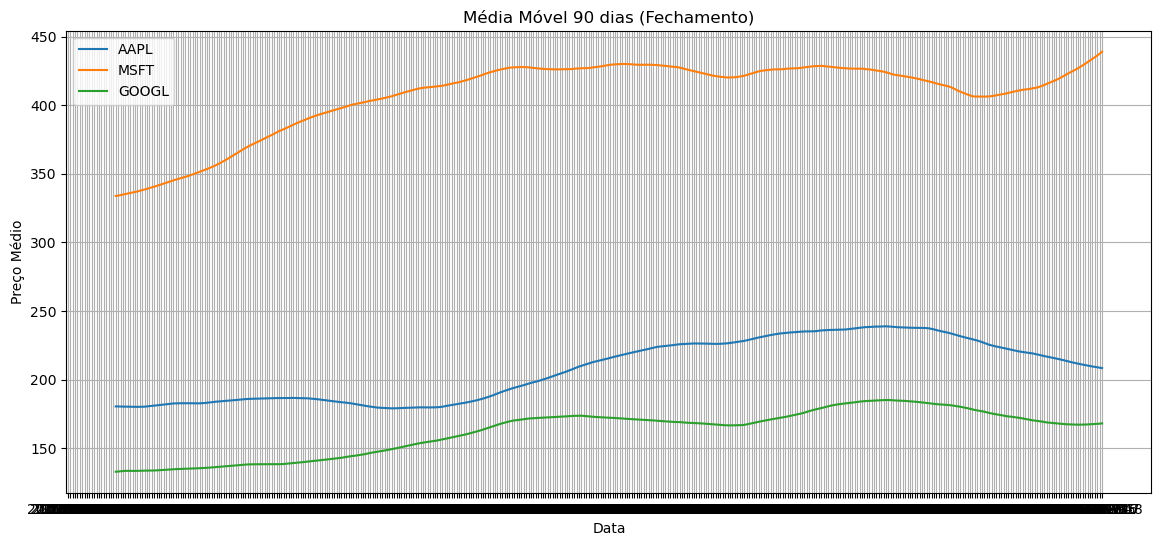

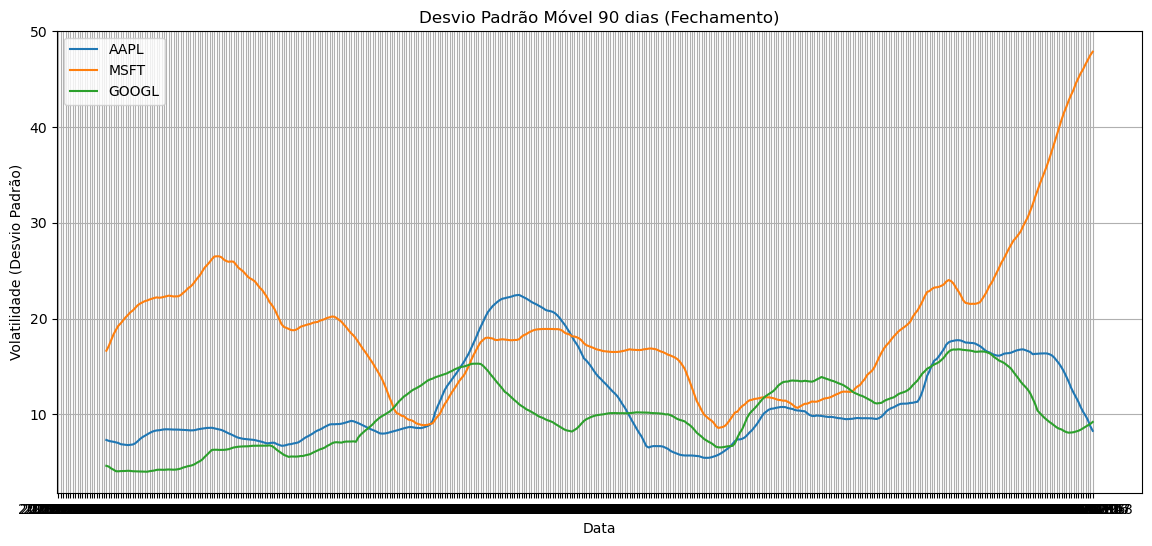

In [29]:
plt.figure(figsize=(14,6))
for ativo, serie in medias_moveis.items():
    plt.plot(serie, label=ativo)
plt.title('Média Móvel 90 dias (Fechamento)')
plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
for ativo, serie in desvios_moveis.items():
    plt.plot(serie, label=ativo)
plt.title('Desvio Padrão Móvel 90 dias (Fechamento)')
plt.xlabel('Data')
plt.ylabel('Volatilidade (Desvio Padrão)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Não bate, até porque foi pego amostra de tempo menor

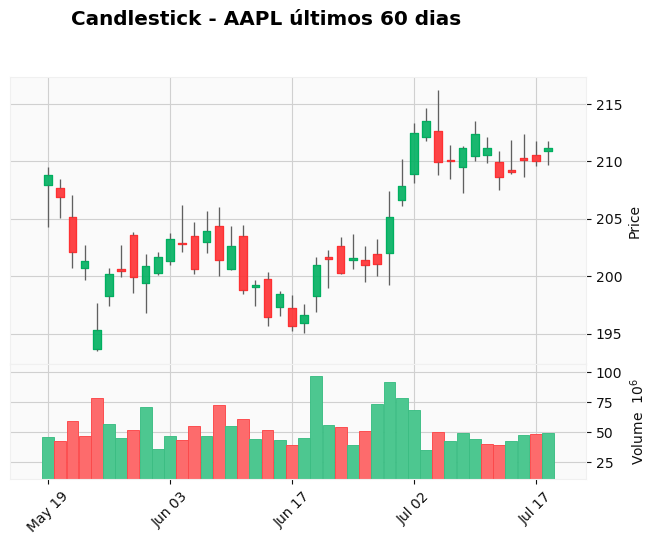

In [40]:
df = dados['AAPL']
df_60d = df.loc[df.index.max() - timedelta(days=60):]

import mplfinance as mpf
mpf.plot(df_60d, type='candle', style='yahoo', title='Candlestick - AAPL últimos 60 dias', volume=True)

